# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dv_2016 = pd.read_csv('/content/domestic_visitors_2016.csv')
dv_2017 = pd.read_csv('/content/domestic_visitors_2017.csv')
dv_2018 = pd.read_csv('/content/domestic_visitors_2018.csv')
dv_2019 = pd.read_csv('/content/domestic_visitors_2019.csv')

In [3]:
fv_2016 = pd.read_csv('/content/foreign_visitors_2016.csv')
fv_2017 = pd.read_csv('/content/foreign_visitors_2017.csv')
fv_2018 = pd.read_csv('/content/foreign_visitors_2018.csv')
fv_2019 = pd.read_csv('/content/foreign_visitors_2019.csv')

# **Concatenating the domestic data sets by following its date**

In [4]:
domestic = [dv_2016,dv_2017,dv_2018,dv_2019]

df1 = pd.concat(domestic)

In [5]:
df1.tail(10)

,district,date,month,year,visitors
386,Yadadri Bhongir,01-03-2019,March,2019,481923
387,Yadadri Bhongir,01-04-2019,April,2019,441150
388,Yadadri Bhongir,01-05-2019,May,2019,345790
389,Yadadri Bhongir,01-06-2019,June,2019,370566
390,Yadadri Bhongir,01-07-2019,July,2019,332770
391,Yadadri Bhongir,01-08-2019,August,2019,389010
392,Yadadri Bhongir,01-09-2019,September,2019,366862
393,Yadadri Bhongir,01-10-2019,October,2019,381860
394,Yadadri Bhongir,01-11-2019,November,2019,365990
395,Yadadri Bhongir,01-12-2019,December,2019,477635


# **Concatenating the foreign data sets by following its date**

In [6]:
foreign = [fv_2016,fv_2017,fv_2018,fv_2019]

df2 = pd.concat(foreign)
df_foreign =df2

In [7]:
df2.tail(10)

,district,date,month,year,visitors
386,Yadadri Bhongir,01-03-2019,March,2019,0
387,Yadadri Bhongir,01-04-2019,April,2019,0
388,Yadadri Bhongir,01-05-2019,May,2019,0
389,Yadadri Bhongir,01-06-2019,June,2019,0
390,Yadadri Bhongir,01-07-2019,July,2019,0
391,Yadadri Bhongir,01-08-2019,August,2019,0
392,Yadadri Bhongir,01-09-2019,September,2019,0
393,Yadadri Bhongir,01-10-2019,October,2019,0
394,Yadadri Bhongir,01-11-2019,November,2019,0
395,Yadadri Bhongir,01-12-2019,December,2019,0


In [8]:
df1.shape

(1512, 5)

In [9]:
df2.shape

(1512, 5)

# **Checking null values**

In [10]:
df1.isnull().sum()

district     0
date         0
month        0
year         0
visitors    30
dtype: int64

In [11]:
#df1 = df1.fillna(0)

In [12]:
df2.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

# **Droping duplicates**

In [13]:
df1 = df1.drop_duplicates()

In [14]:
df2 = df2.drop_duplicates()

In [15]:
df1.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [16]:
df1['visitors'] = df1['visitors'].fillna(0)

In [17]:
df1['visitors'] = df1['visitors'].replace('[^0-9]+', '0', regex=True)

In [18]:
df1['visitors'] = df1['visitors'].astype(int)

In [19]:
df1['date'] = pd.to_datetime(df1['date'])

In [20]:
df1['year'] = df1['year'].astype(int)

In [21]:
df1['month'].value_counts()

January      126
February     126
March        126
April        126
May          126
June         126
July         126
August       126
September    126
October      126
November     126
December     126
Name: month, dtype: int64

In [22]:
df2.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [23]:
df2['visitors'] = df2['visitors'].fillna(0)

In [24]:
df2['visitors'] = df2['visitors'].replace('[^0-9]+', '0', regex=True)

In [25]:
df2['visitors'] = df2['visitors'].astype(int)

In [26]:
df2['date'] = pd.to_datetime(df2['date'])

In [27]:
df2['year'] = df2['year'].astype(int)

# **(Domestic)Top 10 districts that are highest number of vistors in year(2016-2019)**

<Axes: ylabel='district'>

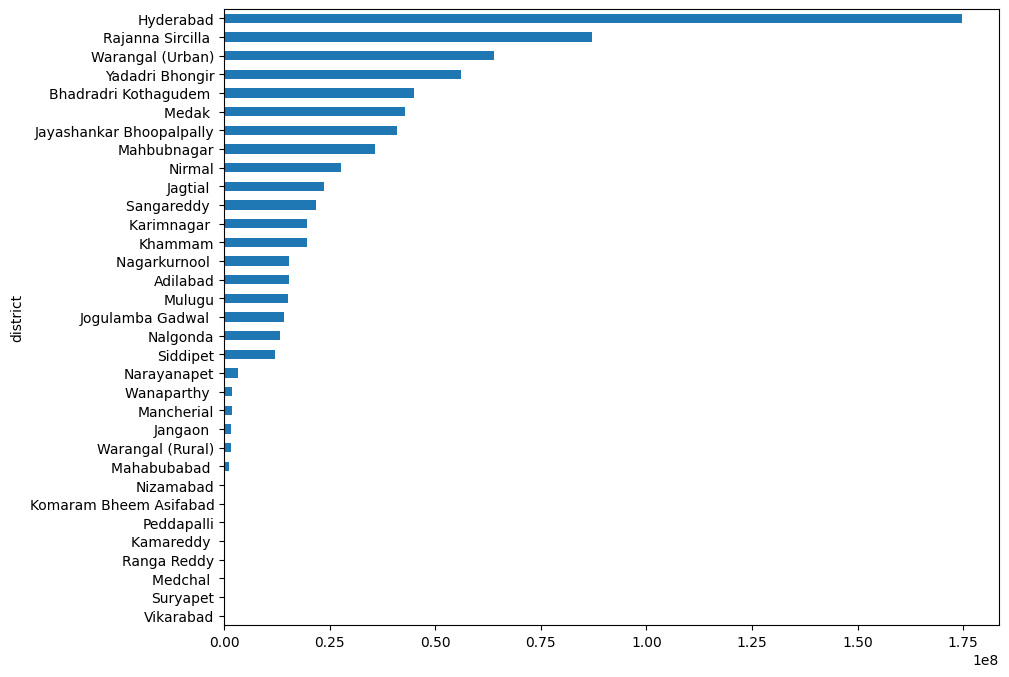

In [28]:
plt.figure(figsize=(10,8))
(df1.groupby('district')['visitors'].mean()*100).sort_values().plot(kind = 'barh')

# **Top 10 districts by Domestics visitors**

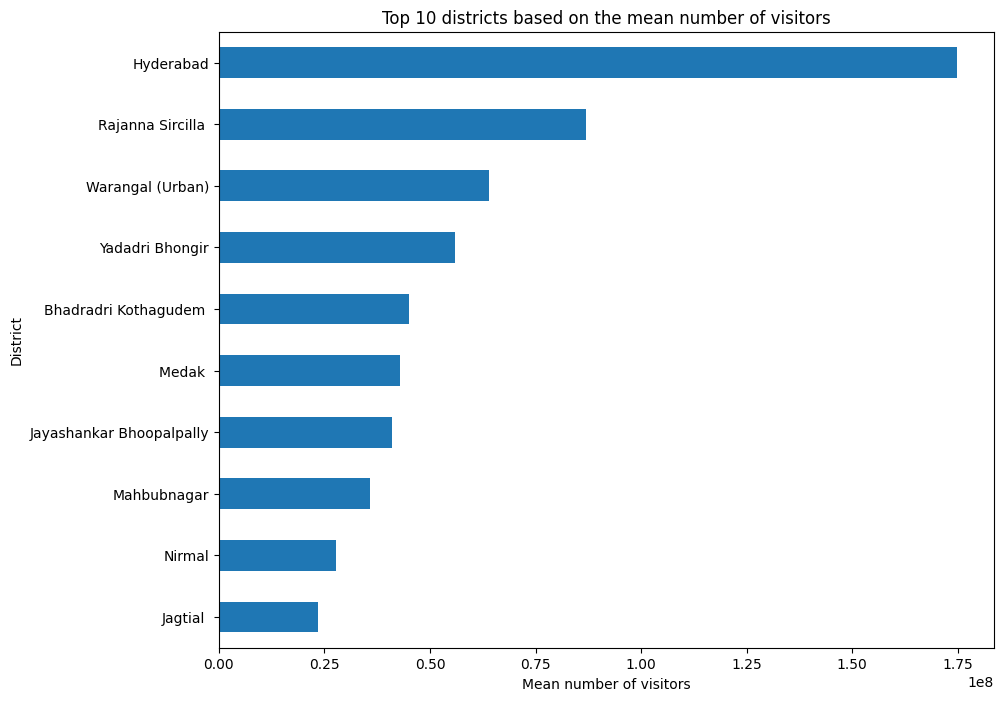

In [29]:
plt.figure(figsize=(10,8))
(df1.groupby('district')['visitors'].mean()*100).sort_values().tail(10).plot(kind = 'barh')
plt.title('Top 10 districts based on the mean number of visitors')
plt.xlabel('Mean number of visitors')
plt.ylabel('District')
plt.show()

# **Top 3 districts based on compounded annual growth**

In [30]:
df_filtered = df1[(df1['year'] >= 2016) & (df1['year'] <= 2019)]

# calculate the CAGR for each district
df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')

# sort the districts by CAGR in descending order
top_districts = df_cagr.sort_values('CAGR', ascending=False)['district'].head(3).tolist()


<ipython-input-30-7acdf794c98c>:4: RuntimeWarning: divide by zero encountered in long_scalars
  df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')
<ipython-input-30-7acdf794c98c>:4: RuntimeWarning: invalid value encountered in long_scalars
  df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')


<Axes: ylabel='count'>

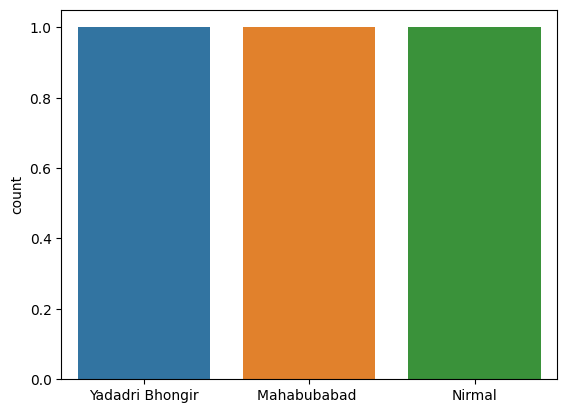

In [31]:
sns.countplot(data = df1,x = top_districts)

# ****Bottom 3 districts based on compounded annual growth****

In [32]:
df_filtered = df1[(df1['year'] >= 2016) & (df1['year'] <= 2019)]

# calculate the CAGR for each district
df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')

# sort the districts by CAGR in descending order
bottom_districts = df_cagr.sort_values('CAGR', ascending=True)['district'].head(3).tolist()

<ipython-input-32-d004e7ea8578>:4: RuntimeWarning: divide by zero encountered in long_scalars
  df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')
<ipython-input-32-d004e7ea8578>:4: RuntimeWarning: invalid value encountered in long_scalars
  df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')


<Axes: ylabel='count'>

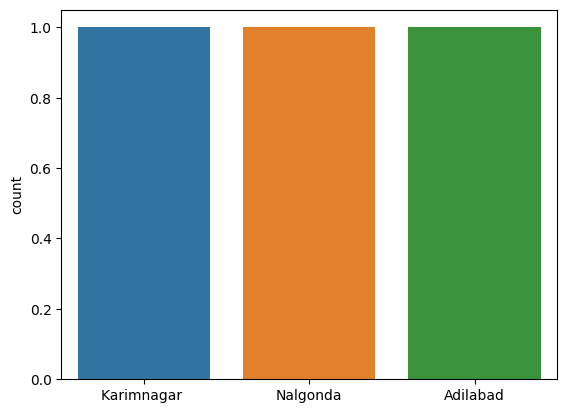

In [33]:
sns.countplot(data = df1,x = bottom_districts)

# **highest visitors based on months from (2016 to 2019)**

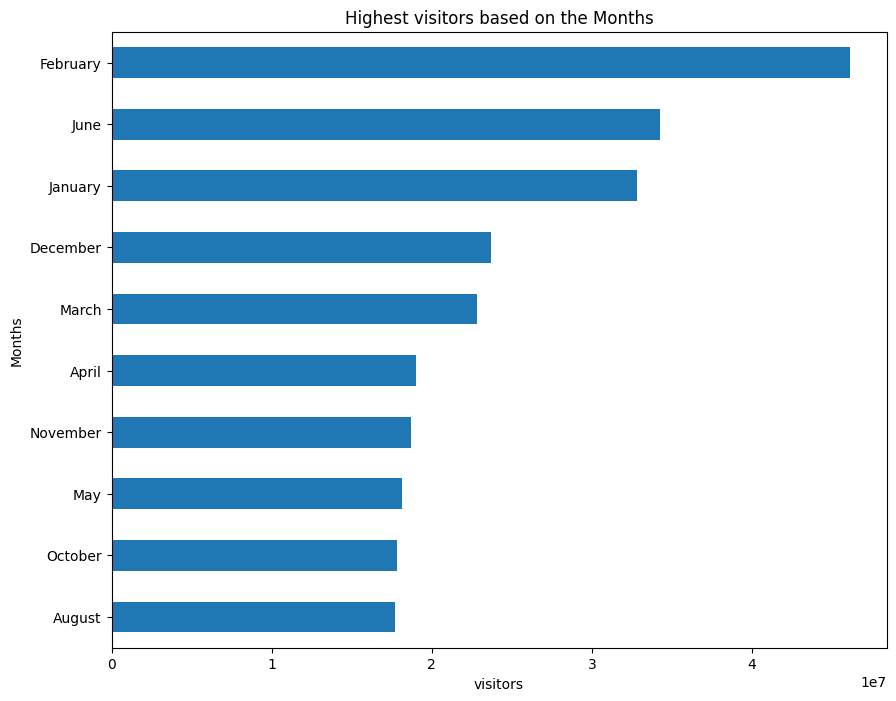

In [34]:
plt.figure(figsize=(10,8))
(df1.groupby('month')['visitors'].mean()*100).sort_values().tail(10).plot(kind = 'barh')
plt.title('Highest visitors based on the Months')
plt.xlabel('visitors')
plt.ylabel('Months')
plt.show()

In [35]:
# Filter the data for Hyderabad district
hyderabad = df1[df1['district'] == 'Hyderabad']


# **highest visitors of (Hyderabad) based on months from (2016 to 2019)**

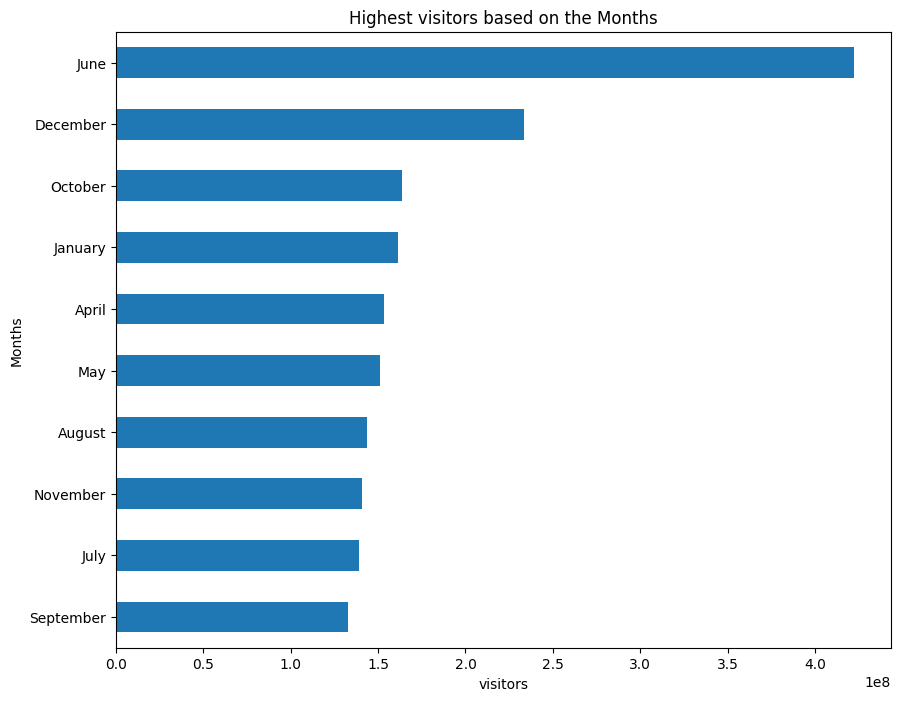

In [36]:
plt.figure(figsize=(10,8))
(hyderabad.groupby('month')['visitors'].mean()*100).sort_values().tail(10).plot(kind = 'barh')
plt.title('Highest visitors based on the Months')
plt.xlabel('visitors')
plt.ylabel('Months')
plt.show()

# **1.The peak month is june in every year were most visitors of domestics public are coming**
# **2.The low season month is September in every year were low visitors of domestics public are coming****

In [37]:
df2.head(10)

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,2
1,Adilabad,2016-01-02,February,2016,0
2,Adilabad,2016-01-03,March,2016,2
3,Adilabad,2016-01-04,April,2016,0
4,Adilabad,2016-01-05,May,2016,0
5,Adilabad,2016-01-06,June,2016,0
6,Adilabad,2016-01-07,July,2016,4
7,Adilabad,2016-01-08,August,2016,2
8,Adilabad,2016-01-09,September,2016,0
9,Adilabad,2016-01-10,October,2016,0


In [38]:
df2.dtypes

district            object
date        datetime64[ns]
month               object
year                 int64
visitors             int64
dtype: object

In [39]:
df2.columns = ['foreign_district', 'foreign_date', 'foreign_month','foreign_year','foreign_visitors']

# **Merging to data frames**

In [40]:
data = pd.concat([df1, df2], axis=1)

In [41]:
data.head(10)

,district,date,month,year,visitors,foreign_district,foreign_date,foreign_month,foreign_year,foreign_visitors
0,Adilabad,2016-01-01,January,2016,792136,Adilabad,2016-01-01,January,2016,2
1,Adilabad,2016-01-02,February,2016,937820,Adilabad,2016-01-02,February,2016,0
2,Adilabad,2016-01-03,March,2016,582946,Adilabad,2016-01-03,March,2016,2
3,Adilabad,2016-01-04,April,2016,341948,Adilabad,2016-01-04,April,2016,0
4,Adilabad,2016-01-05,May,2016,252887,Adilabad,2016-01-05,May,2016,0
5,Adilabad,2016-01-06,June,2016,368237,Adilabad,2016-01-06,June,2016,0
6,Adilabad,2016-01-07,July,2016,447562,Adilabad,2016-01-07,July,2016,4
7,Adilabad,2016-01-08,August,2016,614285,Adilabad,2016-01-08,August,2016,2
8,Adilabad,2016-01-09,September,2016,491279,Adilabad,2016-01-09,September,2016,0
9,Adilabad,2016-01-10,October,2016,94184,Adilabad,2016-01-10,October,2016,0


In [42]:
#data['visitors_y'] = data['foreign_visitors'].replace({0:0.1})

In [43]:
data['ratio'] = data['visitors']//data['foreign_visitors']

In [44]:
data.loc[data['ratio'] == float('inf'), 'ratio'] = float('nan')


In [45]:
data['ratio']  = data['ratio'].fillna(0)

In [46]:
data['foreign_visitors'].unique()

array([    2,     0,     4, 15865, 29646, 13019,  8402,  8522, 10284,
       17142, 12842,  9397, 12808,  8084, 17620,    24,    22,    40,
          13,    21,    11,   123,   126,   103,    75,    58,    68,
          63,    86,    74,    37,    29,    26,     8,    10,   459,
         391,   230,    39,    82,    88,    53,   102,   118,   108,
          97,   132,     5,     3, 19286, 18097, 13875, 12996, 12983,
       12486, 18144, 16985, 27856, 26368, 29170, 38933,    85,    38,
          35,    36,    42,    45,    56,    55,    57,    20,    16,
          32,    31,    34,    25,    41,    43,    44,    54,    47,
          49,    19,    23,    18,    17,    28,   235,   242,   238,
         209,   211,   194,   116,   219,   225,   236,   255,   250,
       35379, 30414, 27535, 20830, 21554, 24677, 17456, 31217, 22809,
       30072, 23487, 29358,    50,    60,    70,     6,    15,    52,
          14,    30,     1,   150,   185,   160,   140,   130,   135,
         145,   170,

In [47]:
top3_districts = data.nlargest(3, 'ratio')['district'].sort_values()
bottom3_districts = data.nsmallest(3, 'ratio')['district'].sort_values()

# **Top 3 districts**

In [48]:
top3_districts

0    Adilabad
7    Adilabad
2    Adilabad
Name: district, dtype: object

# **Bottom_3 districts**

In [49]:
bottom3_districts

1    Adilabad
3    Adilabad
4    Adilabad
Name: district, dtype: object